## Q4 (Answer by DeepSeek-R1-0528)

### Prompt: "Write python code to compute and plot the frequency response (magnitude only) of a filter with a transfer function H(z) = 1 - 0.95z^{-1}. The y-axis of the magnitude response should be in log scale and the horizontal axis in linear scale. Show the methods that use (a) manual computation and (b) python library."

We are going to compute the frequency response of the filter H(z) = 1 - 0.95 z^{-1} We want the magnitude in dB (log scale) and the frequency axis in linear scale (from 0 to π radians/sample).


Two methods: (a) Manual computation: we will compute H(e^{jω}) = 1 - 0.95 * e^{-jω} for a set of frequencies. Then compute the magnitude in dB: 20 * log10(|H(e^{jω})|)


(b) Using Python library: we can use scipy.signal.freqz to compute the frequency response.


### Steps for both:


Define the filter coefficients: numerator (b) and denominator (a). Since it's FIR, denominator is 1. H(z) = (1 - 0.95 z^{-1}) = (z - 0.95) / z ... but for freqz we represent as: b = [1, -0.95] (coefficients for z^0 and z^{-1}) a = [1] (denominator)

For manual: we compute over a grid of frequencies (0 to pi) and evaluate the transfer function.

For library: use freqz from scipy.signal.

Plot the magnitude in dB for both methods on the same plot to verify.


We'll plot the frequency in radians/sample on the x-axis (linear) and the magnitude in dB on the y-axis.


Note: We avoid division by zero in dB by replacing zeros with a very small number? But in this filter, the magnitude is never zero? However, we should be cautious. Alternatively, we can clip the magnitude to a minimum value if needed.

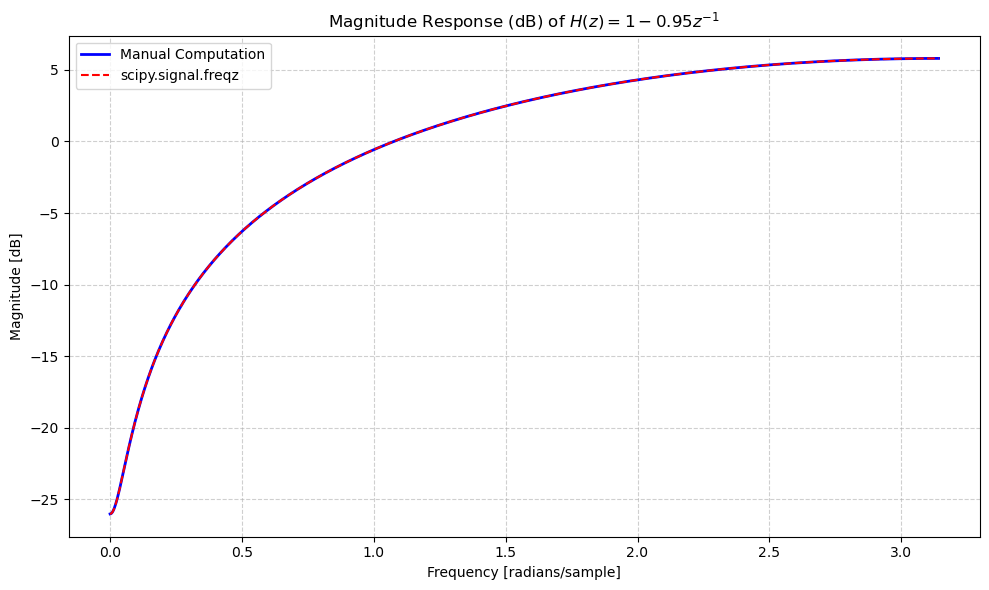

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Filter coefficients
b = np.array([1.0, -0.95])  # Numerator coefficients: [b0, b1]
a = np.array([1.0])         # Denominator coefficients (1 for FIR)

# Frequency grid
N = 1024
w = np.linspace(0, np.pi, N)

# Method (a): Manual computation
# H(e^{jw}) = b0 + b1 * e^{-jw}
h_manual = b[0] + b[1] * np.exp(-1j * w)
magnitude_manual = np.abs(h_manual)
magnitude_dB_manual = 20 * np.log10(np.maximum(1e-10, magnitude_manual))  # Avoid log(0)

# Method (b): Using scipy.signal.freqz
w_freqz, h_freqz = freqz(b, a, worN=w)
magnitude_freqz = np.abs(h_freqz)
magnitude_dB_freqz = 20 * np.log10(np.maximum(1e-10, magnitude_freqz))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(w, magnitude_dB_manual, 'b-', linewidth=2, label='Manual Computation')
plt.plot(w_freqz, magnitude_dB_freqz, 'r--', linewidth=1.5, label='scipy.signal.freqz')
plt.title('Magnitude Response (dB) of $H(z) = 1 - 0.95z^{-1}$')
plt.xlabel('Frequency [radians/sample]')
plt.ylabel('Magnitude [dB]')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Showing how the glottal pulses cause spectral tilt to the vocal tract filter

In [ ]:
!pip install zplane

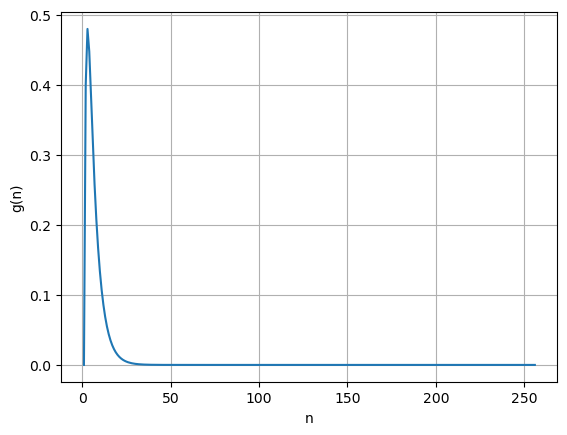

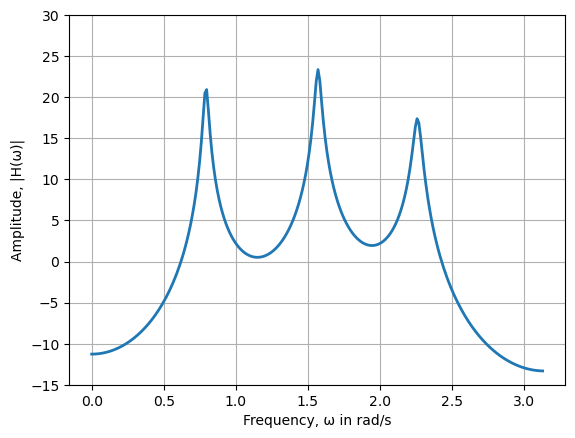

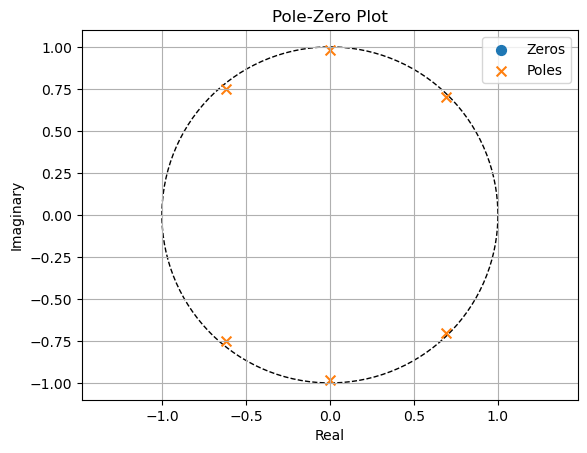

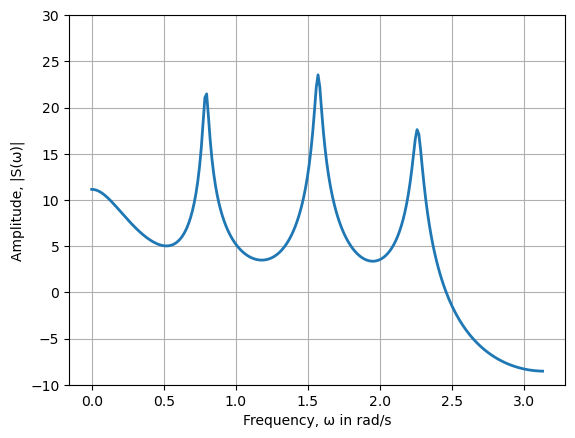

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
import zplane

# Parameters
MAXY = 0.7
MINY = 0
MAXX = 70
MINX = 0
ALPHA = 0.8
BETA = 0.4

# Impulse response of the glottal filter
N = 512
a = np.ones(N)
u = np.arange(N)
alpha = a * ALPHA
beta = a * BETA
g = (alpha ** u) - (beta ** u)

plt.figure()
plt.plot(np.arange(1, N//2 + 1), g[:N//2], linewidth=1.5)
plt.xlabel('n')
plt.ylabel('g(n)')
plt.grid(True)

# Define filter sections (as in MATLAB cell array)
a_sections = [
    [1, 0.62 - 0.75j],
    [1, 0.62 + 0.75j],
    [1, 0.98j],
    [1, -0.98j],
    [1, -0.69 + 0.7j],
    [1, -0.69 - 0.7j]
]

# Convolve all sections to get overall denominator
af = a_sections[0]
for section in a_sections[1:]:
    af = np.convolve(af, section)
af = np.real(af)  # Take real part

# Frequency response
w, h = freqz([1], af, N//2)
xAxis = w  # Frequency axis

plt.figure()
plt.plot(xAxis, 20 * np.log10(np.abs(h)), linewidth=2)
plt.ylim([-15, 30])
plt.xlabel('Frequency, ω in rad/s')
plt.ylabel('Amplitude, |H(ω)|')
plt.grid(True)

# Pole-zero plot (zplane)
from matplotlib import patches

def zplane(b, a):
    """Plot the complex z-plane given a transfer function."""
    plt.figure()
    ax = plt.gca()
    # Unit circle
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    # Zeros and poles
    zeros = np.roots(b)
    poles = np.roots(a)
    plt.scatter(np.real(zeros), np.imag(zeros), s=50, marker='o', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), s=50, marker='x', label='Poles')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Pole-Zero Plot')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

zplane([1], af)

# Compute U(w) (glottal source spectrum)
U = np.abs(np.fft.fft(g, N))
U = U[:N//2]  # Only first half (positive frequencies)

# Add the log-spectrum |H(w)| and |U(w)|
plt.figure()
plt.plot(xAxis, 20 * np.log10(np.abs(h) + U), linewidth=2)
plt.ylim([-10, 30])
plt.xlabel('Frequency, ω in rad/s')
plt.ylabel('Amplitude, |S(ω)|')
plt.grid(True)
plt.show()

## Q5 (Matlab code converted to Python by ChatGPT4.1)

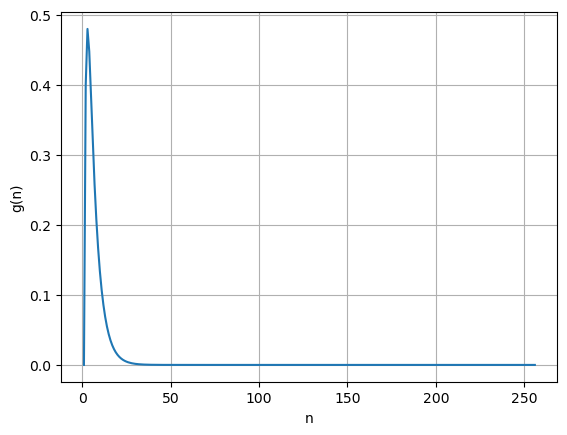

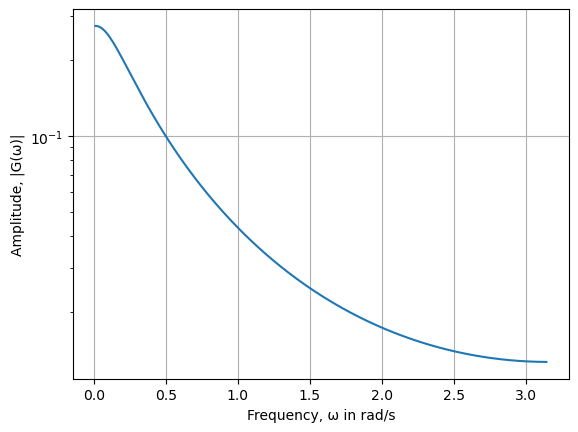

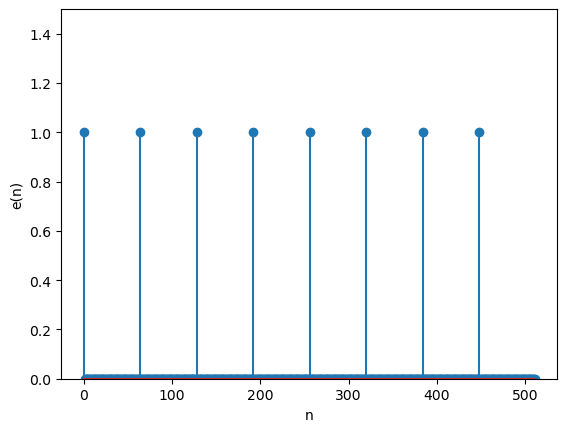

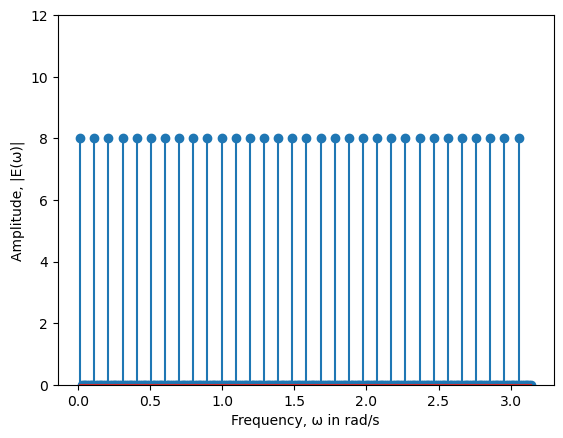

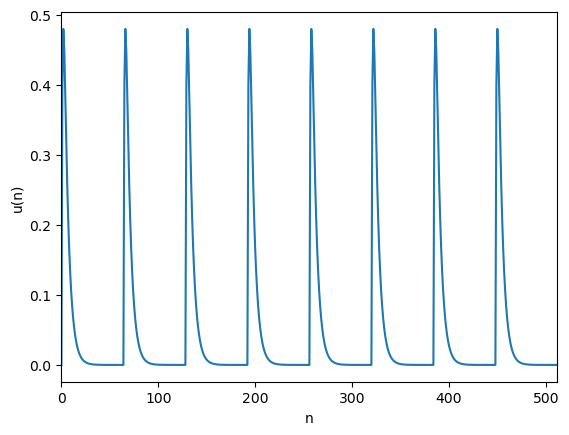

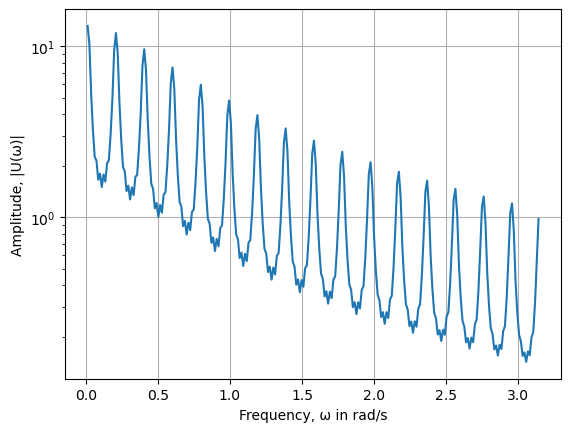

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
MAXY = 0.7
MINY = 0
MAXX = 70
MINX = 0
ALPHA = 0.8
BETA = 0.4

# Impulse response of the glottal filter
N = 512
a = np.ones(N)
u = np.arange(N)
alpha = a * ALPHA
beta = a * BETA
g = (alpha ** u) - (beta ** u)

plt.figure()
plt.plot(np.arange(1, N//2 + 1), g[:N//2])
plt.xlabel('n')
plt.ylabel('g(n)')
plt.grid(True)

# Frequency response of the glottal filter
plt.figure()
G = np.abs(np.fft.fft(g * np.hamming(len(g))))
xAxis = np.arange(1, N//2 + 1) / (N//2) * np.pi
plt.semilogy(xAxis, G[:N//2])
plt.xlabel('Frequency, ω in rad/s')
plt.ylabel('Amplitude, |G(ω)|')
plt.grid(True)

# Frequency spectrum of an impulse train
P = 64
e = np.zeros(N)
e[::P] = 1

plt.figure()
plt.stem(np.arange(N), e)
plt.ylim([0, 1.5])
plt.xlabel('n')
plt.ylabel('e(n)')

plt.figure()
E = np.abs(np.fft.fft(e))
plt.stem(xAxis, E[:N//2])
plt.xlabel('Frequency, ω in rad/s')
plt.ylabel('Amplitude, |E(ω)|')
plt.ylim([0, np.max(E) * 1.5])

# Frequency spectrum of glottal pulse train
u_conv = np.convolve(e, g)
plt.figure()
plt.plot(u_conv)
plt.xlim([0, N])
plt.xlabel('n')
plt.ylabel('u(n)')

U = np.abs(np.fft.fft(u_conv * np.hamming(len(u_conv))))
plt.figure()
plt.semilogy(xAxis, U[:N//2])
plt.grid(True)
plt.xlabel('Frequency, ω in rad/s')
plt.ylabel('Amplitude, |U(ω)|')

plt.show()